In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
users = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/users.csv')
words = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/words.csv')
train = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/train.csv')

## Due to number of missing values in the words dataset, I'm going to categorize them into a smaller list of key words:

- **Edgy**:
'Aggressive', 'Edgy', 'Noisy', 'Rebellious'

- **Chill**:
'Laid back', 'Calm', 'Relaxed', 'Worldly', 'Background', 'Way out'

- **Playful**:
'Uplifting', 'Colourful', 'Youthful', 'Outgoing', 'Exciting', 'Energetic', 'Fun', 'Cool', 'Free', 'Upbeat', 'Catchy', 'Playful', 'Sociable'

- **Dark**
'Dark', 'Depressing', 'Serious'

- **Negative**:
'Unattractive', 'Annoying', 'Fake', 'Boring', 'Uninspired', 'Superficial', 'Arrogant', 'Unapproachable', 'Unoriginal', 'Intrusive', 'Not authentic', 'Cheap', 'Irrelevant', 'Cheesy'

- **Sensitive**:
'Relatable', 'Nostalgic', 'Warm', 'Authentic', 'Thoughtful', 'Passionate', 'Sensitive', 'Beautiful', 'Heartfelt', 'Emotional', 'Wholesome', 'Soulful', 'Inspiring', 'Good_Lyrics'

- **Mainstream**:
'Current', 'Mainstream', 'Popular', 'Approachable'

- **Iconic**
'Pioneer', 'Timeless', 'Genius', 'Iconic', 'Classic', 'Legendary', 'Superstar', 'Original', 'Credible', 'Sophisticated'

- **Stylish**:
'Stylish', 'Trendsetter', 'Progressive', 'Intriguing', 'Sexy', 'Talented', 'Distinctive', 'Confident', 'Outspoken'

- **Outdated**:
'Old', 'Dated', 'Over'

- **None of these**:
'None of these'


In [111]:
# Combine good lyrics
Good_Lyrics = []
zipped_lyrics = zip(list(words['Good lyrics']),list(words['Good Lyrics']))
for i in zipped_lyrics:
    if np.isnan(i[0]) == True:
        Good_Lyrics.append(i[1])
    else:
        Good_Lyrics.append(i[0])
words['Good_Lyrics']=pd.DataFrame(Good_Lyrics)
words = words.drop(labels=['Good lyrics', 'Good Lyrics'],axis=1)
words.columns

Index([u'Artist', u'User', u'HEARD_OF', u'OWN_ARTIST_MUSIC', u'LIKE_ARTIST',
       u'Uninspired', u'Sophisticated', u'Aggressive', u'Edgy', u'Sociable',
       u'Laid back', u'Wholesome', u'Uplifting', u'Intriguing', u'Legendary',
       u'Free', u'Thoughtful', u'Outspoken', u'Serious', u'Unattractive',
       u'Confident', u'Old', u'Youthful', u'Boring', u'Current', u'Colourful',
       u'Stylish', u'Cheap', u'Irrelevant', u'Heartfelt', u'Calm', u'Pioneer',
       u'Outgoing', u'Inspiring', u'Beautiful', u'Fun', u'Authentic',
       u'Credible', u'Way out', u'Cool', u'Catchy', u'Sensitive',
       u'Mainstream', u'Superficial', u'Annoying', u'Dark', u'Passionate',
       u'Not authentic', u'Background', u'Timeless', u'Depressing',
       u'Original', u'Talented', u'Worldly', u'Distinctive', u'Approachable',
       u'Genius', u'Trendsetter', u'Noisy', u'Upbeat', u'Relatable',
       u'Energetic', u'Exciting', u'Emotional', u'Nostalgic', u'None of these',
       u'Progressive', u'Sexy'

In [112]:
words = words.drop(labels='Unnamed: 87', axis=1)

In [113]:
word_categories = {'Edgy_':['Aggressive', 'Edgy', 'Noisy', 'Rebellious'],
                   'Chill_': ['Laid back', 'Calm', 'Relaxed', 'Worldly', 'Background', 'Way out'],
                   'Playful_': ['Uplifting', 'Colourful', 'Youthful', 'Outgoing', 'Exciting', 'Energetic', 'Fun',
                               'Cool', 'Free', 'Upbeat', 'Catchy', 'Playful', 'Sociable'],
                   'Dark_': ['Dark', 'Depressing', 'Serious'],
                   'Negative_': ['Unattractive', 'Annoying', 'Fake', 'Boring','Uninspired',
                                'Superficial', 'Arrogant', 'Unapproachable', 'Unoriginal',
                                'Intrusive', 'Not authentic', 'Cheap', 'Irrelevant', 'Cheesy'],
                   'Sensitive_': ['Relatable', 'Nostalgic', 'Warm', 'Authentic', 'Thoughtful',
                                 'Passionate', 'Sensitive', 'Beautiful','Heartfelt', 'Emotional', 
                                 'Wholesome', 'Soulful', 'Inspiring', 'Good_Lyrics'],
                   'Mainstream_': ['Current', 'Mainstream', 'Popular', 'Approachable'],
                   'Iconic_': ['Pioneer', 'Timeless', 'Genius', 'Iconic', 'Classic', 'Legendary',
                              'Superstar', 'Original', 'Credible', 'Sophisticated'],
                   'Stylish_': ['Stylish', 'Trendsetter', 'Progressive', 'Intriguing',
                               'Sexy','Talented', 'Distinctive', 'Confident', 'Outspoken'],
                   'Outdated_': ['Old', 'Dated', 'Over'],
                   'None_of_these_': ['None of these']}

In [114]:
words.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Good_Lyrics
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,0.0
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,0.0
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,0.0
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,0.0


In [ ]:
def categorizer(cell):
    counter = 0
    for i in words.columns:
        for j in word_categories.keys():
            if i in word_categories[j]:

In [27]:
counter = 0
for i in words.columns:
    for j in word_categories.keys():
        if i in word_categories[j]:
            counter += 1

In [115]:
word_categories.keys()

['Dark_',
 'Outdated_',
 'Stylish_',
 'Iconic_',
 'Negative_',
 'Mainstream_',
 'None_of_these_',
 'Sensitive_',
 'Playful_',
 'Chill_',
 'Edgy_']

In [58]:
counter = 0
for i in categories:
    categories.append(i)
    categories[counter] = words[word_categories[i]]
    counter +=1

In [116]:
edgy = words[word_categories['Edgy_']]
negative = words[word_categories['Negative_']]
sensitive = words[word_categories['Sensitive_']]
stylish = words[word_categories['Stylish_']]
dark = words[word_categories['Dark_']]
none = words[word_categories['None_of_these_']]
mainstream = words[word_categories['Mainstream_']]
iconic = words[word_categories['Iconic_']]
playful = words[word_categories['Playful_']]
outdated = words[word_categories['Outdated_']]
chill = words[word_categories['Chill_']]

In [117]:
edgy['Edgy_'] = words[word_categories['Edgy_']].sum(axis=1)
negative['Negative_'] = words[word_categories['Negative_']].sum(axis=1)
sensitive['Sensitive_'] = words[word_categories['Sensitive_']].sum(axis=1)
stylish['Stylish_'] = words[word_categories['Stylish_']].sum(axis=1)
dark['Dark_'] = words[word_categories['Dark_']].sum(axis=1)
none['None_of_these_'] = words[word_categories['None_of_these_']].sum(axis=1)
mainstream['Mainstream_'] = words[word_categories['Mainstream_']].sum(axis=1)
iconic['Iconic_'] = words[word_categories['Iconic_']].sum(axis=1)
playful['Playful_'] = words[word_categories['Playful_']].sum(axis=1)
outdated['Outdated_'] = words[word_categories['Outdated_']].sum(axis=1)
chill['Chill_'] = words[word_categories['Chill_']].sum(axis=1)

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/johnsnyder/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/johnsnyder/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [120]:
categories

['Negative',
 'Edgy',
 'Sensitive',
 'Stylish',
 'Dark',
 'None_of_these',
 'Mainstream',
 'Iconic',
 'Playful',
 'Outdated',
 'Chill']

In [146]:
words_categorized = pd.concat((words.ix[:,:5],edgy.ix[:,-1:],negative.ix[:,-1],sensitive.ix[:,-1],
                               stylish.ix[:,-1],dark.ix[:,-1],none.ix[:,-1],mainstream.ix[:,-1],
                               iconic.ix[:,-1],playful.ix[:,-1],outdated.ix[:,-1],chill.ix[:,-1]), axis=1)

In [147]:
words_categorized

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Edgy_,Negative_,Sensitive_,Stylish_,Dark_,None_of_these_,Mainstream_,Iconic_,Playful_,Outdated_,Chill_
0,47,45969,Heard of,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,35,29118,Never heard of,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,2.0,0.0,0.0
2,14,31544,Heard of,NaN,NaN,0.0,0.0,2.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0
3,23,18085,Never heard of,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,23,18084,Never heard of,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
5,23,18082,Never heard of,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
6,23,18080,Never heard of,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0,1.0,1.0,1.0,0.0,1.0
7,14,31541,Heard of,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0
8,46,43802,Heard of and listened to music EVER,Own none of their music,25.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0
9,23,18077,Never heard of,NaN,NaN,1.0,6.0,0.0,0.0,1.0,0,0.0,0.0,0.0,2.0,0.0


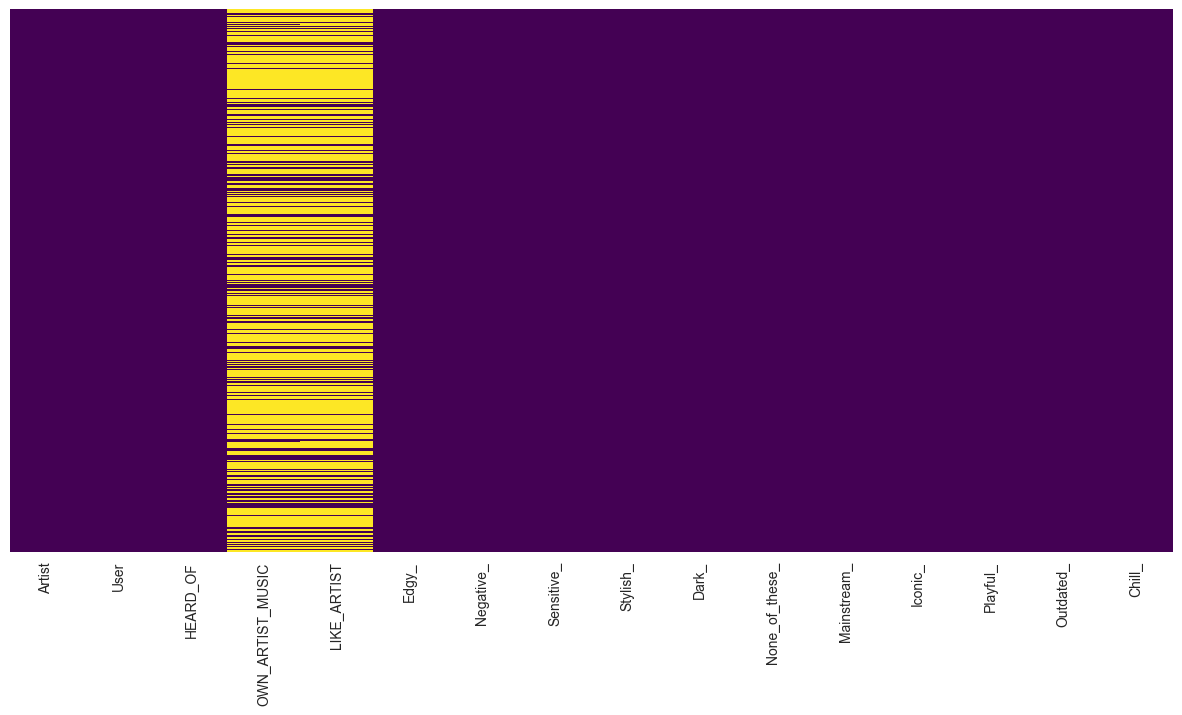

In [130]:
plt.figure(figsize=(15,7))
sns.heatmap(words_categorized.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [135]:
words_categorized = words_categorized.drop(['OWN_ARTIST_MUSIC','LIKE_ARTIST'],axis=1)

In [137]:
words_categorized

,Artist,User,HEARD_OF,Edgy_,Negative_,Sensitive_,Stylish_,Dark_,None_of_these_,Mainstream_,Iconic_,Playful_,Outdated_,Chill_
0,47,45969,Heard of,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,35,29118,Never heard of,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,2.0,0.0,0.0
2,14,31544,Heard of,0.0,0.0,2.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0
3,23,18085,Never heard of,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,23,18084,Never heard of,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
5,23,18082,Never heard of,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
6,23,18080,Never heard of,1.0,0.0,0.0,2.0,0.0,0,1.0,1.0,1.0,0.0,1.0
7,14,31541,Heard of,0.0,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0
8,46,43802,Heard of and listened to music EVER,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0
9,23,18077,Never heard of,1.0,6.0,0.0,0.0,1.0,0,0.0,0.0,0.0,2.0,0.0


In [143]:
words_categorized.to_csv(path_or_buf='/Users/johnsnyder/GA-DSI-working/Capstone/EMI/words_categorized.csv')